<a href="https://colab.research.google.com/github/Sivayogesh-gif/Time_Frequency_Analysis/blob/main/Time_Frequency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install soundfile

In [3]:
# Student_ID = 2023A3PS0366P
# Lab_1 = Time and Frequency Analysis
# EEE F311 Communication Systems
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import square
import soundfile as sf

class InfsourceID :
  def __init__(self, fs=1000, duration=1):
    self.fs = fs
    self.duration = duration
    self.t = np.linspace(0, duration, int(fs * duration), endpoint = False)

  def sine_wave(self, freq):
     return np.sin(2 * np.pi * freq * self.t)

  def square_wave(self, freq):
     return square(2 * np.pi * freq * self.t)

  def sinc_wave(self, B):
    return np.sinc(2 * B * (self.t - self.duration / 2))

  def digital_signal(self, text):
     bits = ''.join(format(ord(c), '08b') for c in text)
     return np.array([int(b) for b in bits])

  def audio_signal(self, file_path):
    data, fs = sf.read(file_path)
    return data, fs

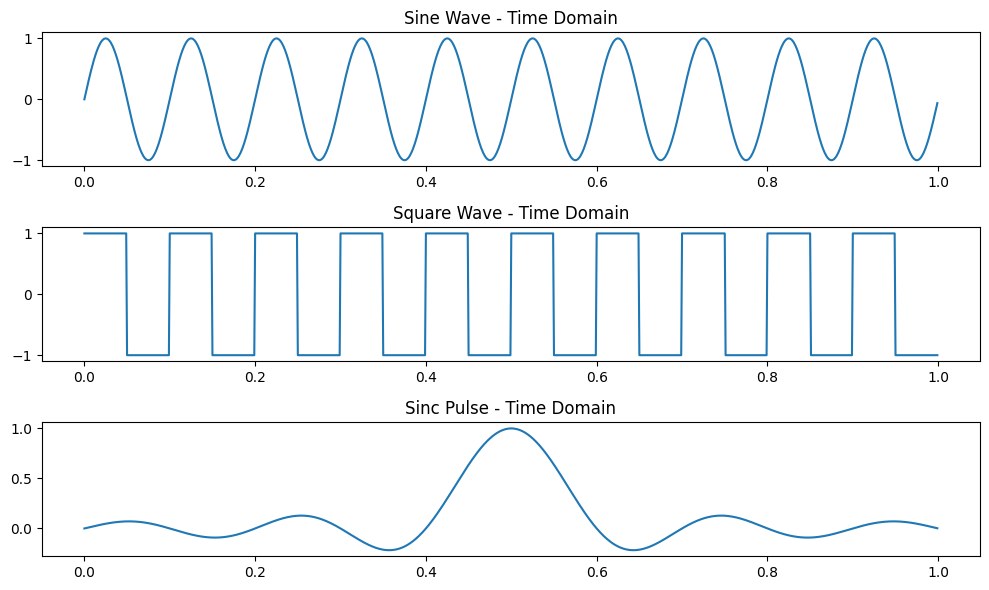

In [4]:
source = InfsourceID(fs=1000, duration=1)

# Generate signals
sine = source.sine_wave(10)
square_sig = source.square_wave(10)
sinc_sig = source.sinc_wave(B=5)

# Plot Time Domain
plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(source.t, sine)
plt.title('Sine Wave - Time Domain')

plt.subplot(3,1,2)
plt.plot(source.t, square_sig)
plt.title('Square Wave - Time Domain')

plt.subplot(3,1,3)
plt.plot(source.t, sinc_sig)
plt.title('Sinc Pulse - Time Domain')
plt.tight_layout()
plt.show()


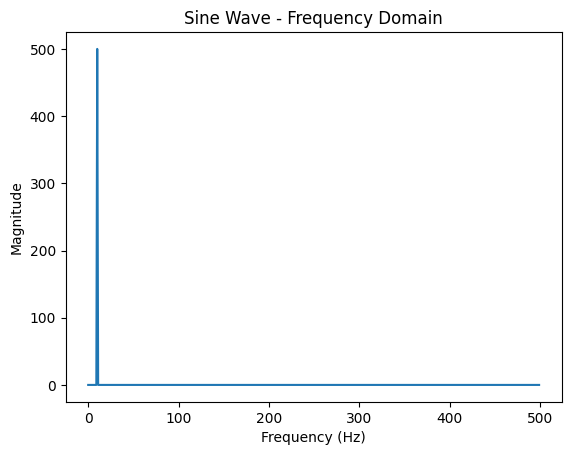

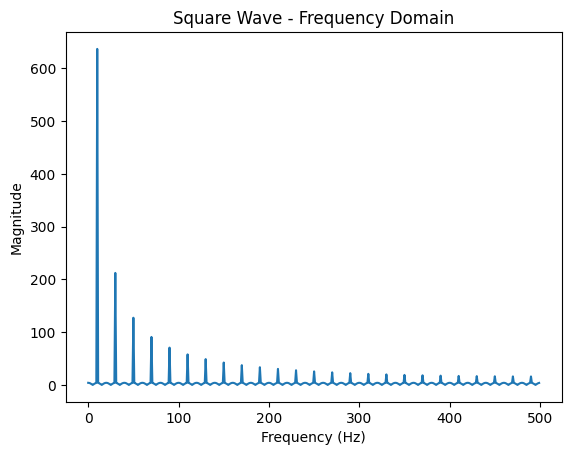

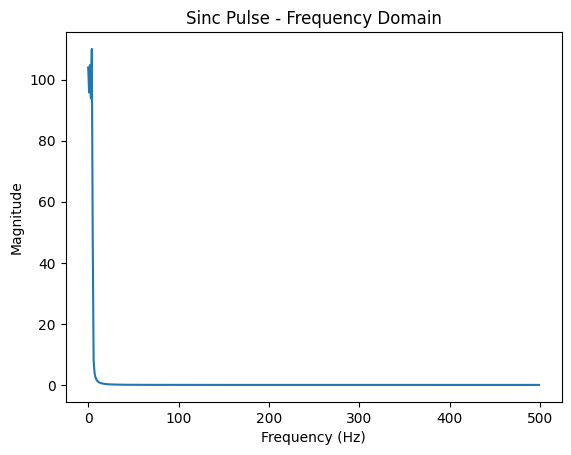

In [5]:
def plot_fft(signal, fs, title):
  N = len(signal)
  yf = fft(signal)
  xf = fftfreq(N, 1/fs)
  plt.plot(xf[:N//2], np.abs(yf[:N//2]))
  plt.title(f'{title} - Frequency Domain')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.show()

plot_fft(sine, source.fs, 'Sine Wave')
plot_fft(square_sig, source.fs, 'Square Wave')
plot_fft(sinc_sig, source.fs, 'Sinc Pulse')

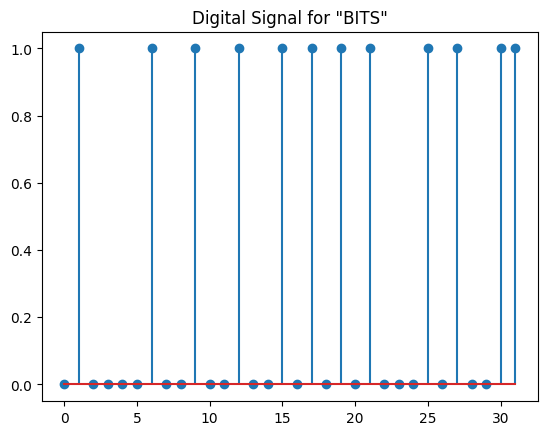

In [6]:
text_signal = source.digital_signal("BITS")
plt.stem(range(len(text_signal)), text_signal)
plt.title('Digital Signal for "BITS"')
plt.show()

In [7]:
import numpy as np
import soundfile as sf

fs = 44100
duration = 1.0
t = np.linspace(0, duration, int(fs*duration), endpoint=False)
signal = 0.5 * np.sin(2 * np.pi * 440 * t)

sf.write('sample.wav', signal, fs)
print("sample.wav created successfully")

sample.wav created successfully


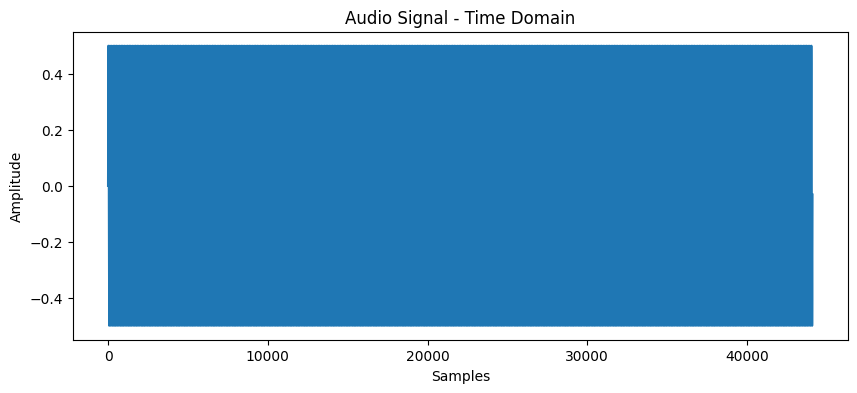

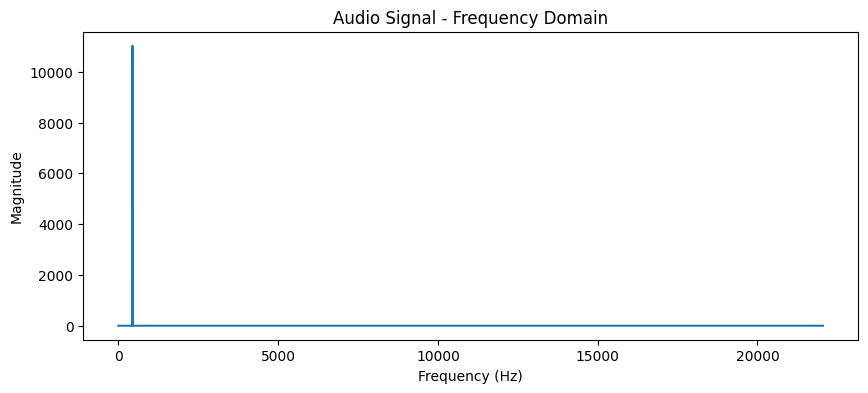

In [8]:
audio_data, fs = source.audio_signal('sample.wav')

plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Audio Signal - Time Domain')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

from scipy.fft import fft, fftfreq
N = len(audio_data)
yf = fft(audio_data)
xf = fftfreq(N, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))
plt.title('Audio Signal - Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

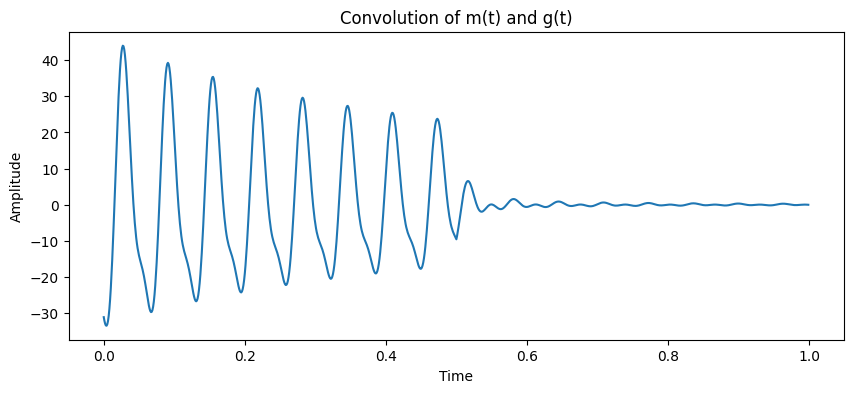

In [9]:
# Convolution of m(t) and g(t)
B1, B2 = 5, 10
mt = 2*B1*np.sinc(2*np.pi*B1*source.t)
gt = 2*B2*np.sinc(2*np.pi*B2*source.t)
conv_result = np.convolve(mt, gt, mode='same')

plt.figure(figsize=(10, 4))
plt.plot(source.t, conv_result)
plt.title('Convolution of m(t) and g(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
